
  There is a binary version available but the source version is later:
             binary source needs_compilation
RColorBrewer  1.1-2  1.1-3             FALSE



installing the source package 'RColorBrewer'



package 'Boruta' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bhoom\AppData\Local\Temp\Rtmp4aZanu\downloaded_packages


Warning message:
"package 'Boruta' was built under R version 3.6.3"

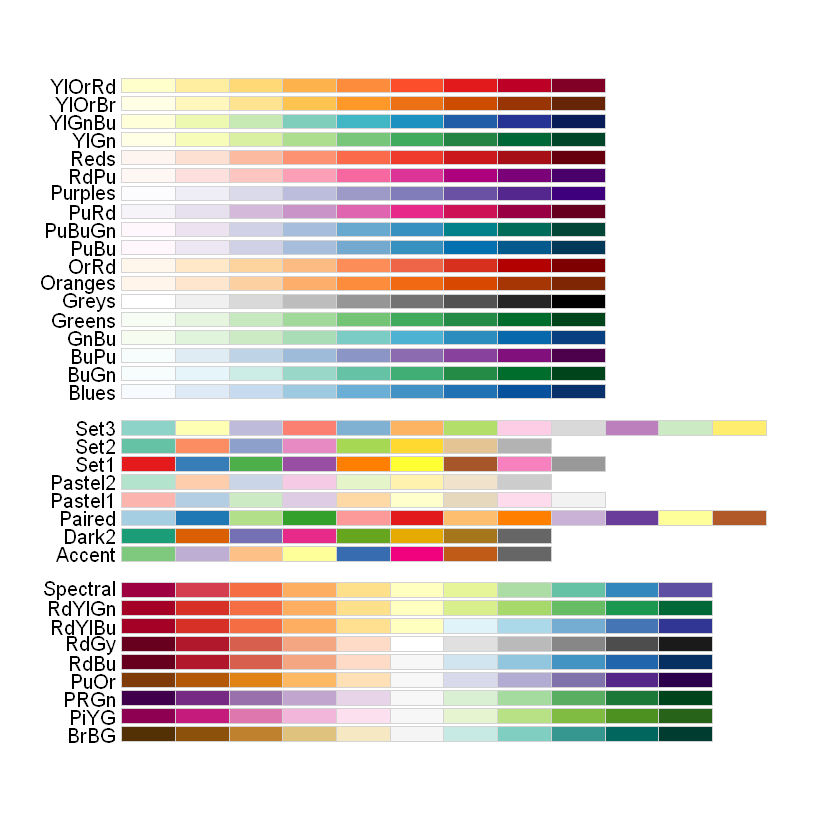

In [1]:
install.packages("RColorBrewer")
library(RColorBrewer)
par(mar=c(3,4,2,2))
display.brewer.all()
install.packages("Boruta")
library(Boruta)

In [2]:
data1 <- read.csv("SRER21_dataset_v1.csv")

In [3]:
data1$Veg_class = as.factor(data1$Veg_class)
data2 <- na.omit(data1)
traindata = subset(data2, select = -c(ï..OID_,Id,gridcode,Shape_Length,Shape_Area))
str(traindata)

'data.frame':	6805 obs. of  14 variables:
 $ CH_mean  : num  1 1 0.92 1 0.143 ...
 $ ARVI_mean: num  0.2739 0.5302 0.478 0.3429 0.0444 ...
 $ ARVI_med : num  0.2739 0.5302 0.501 0.3429 -0.0089 ...
 $ ARVI_max : num  0.274 0.53 0.617 0.343 0.266 ...
 $ EVI_mean : num  0.323 0.461 0.381 0.347 0.182 ...
 $ EVI_med  : num  0.323 0.461 0.385 0.347 0.147 ...
 $ EVI_max  : num  0.323 0.461 0.447 0.347 0.316 ...
 $ NDVI_mean: num  0.428 0.612 0.576 0.469 0.224 ...
 $ NDVI_med : num  0.428 0.612 0.597 0.469 0.179 ...
 $ NDVI_max : num  0.428 0.612 0.674 0.469 0.412 ...
 $ SAVI_mean: num  0.312 0.416 0.36 0.324 0.178 ...
 $ SAVI_med : num  0.312 0.416 0.364 0.324 0.147 ...
 $ SAVI_max : num  0.312 0.416 0.414 0.324 0.299 ...
 $ Veg_class: Factor w/ 3 levels "","non-woody",..: 3 3 3 3 2 3 3 2 3 3 ...


In [4]:
set.seed(100)
boruta <- Boruta(Veg_class~., data = traindata, doTrace = 2)
boruta

 1. run of importance source...
Warning message:
"Dropped unused factor level(s) in dependent variable: ." 2. run of importance source...
Warning message:
"Dropped unused factor level(s) in dependent variable: ." 3. run of importance source...
Warning message:
"Dropped unused factor level(s) in dependent variable: ." 4. run of importance source...
Warning message:
"Dropped unused factor level(s) in dependent variable: ." 5. run of importance source...
Warning message:
"Dropped unused factor level(s) in dependent variable: ." 6. run of importance source...
Warning message:
"Dropped unused factor level(s) in dependent variable: ." 7. run of importance source...
Warning message:
"Dropped unused factor level(s) in dependent variable: ." 8. run of importance source...
Warning message:
"Dropped unused factor level(s) in dependent variable: ." 9. run of importance source...
Warning message:
"Dropped unused factor level(s) in dependent variable: ." 10. run of importance source...
Warning messa

Boruta performed 11 iterations in 56.03682 secs.
 13 attributes confirmed important: ARVI_max, ARVI_mean, ARVI_med,
CH_mean, EVI_max and 8 more;
 No attributes deemed unimportant.

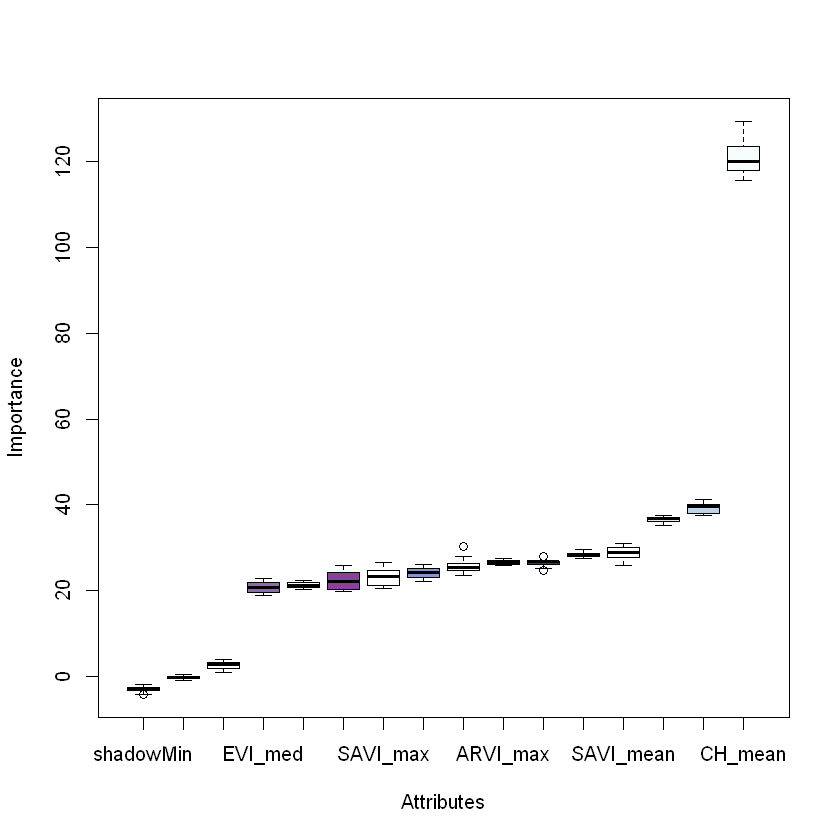

In [5]:
plot(boruta, col = brewer.pal(9, "BuPu"))

In [6]:
getConfirmedFormula(boruta)

Veg_class ~ CH_mean + ARVI_mean + ARVI_med + ARVI_max + EVI_mean + 
    EVI_med + EVI_max + NDVI_mean + NDVI_med + NDVI_max + SAVI_mean + 
    SAVI_med + SAVI_max
<environment: 0x00000000655ce4c0>

In [7]:
attStats(boruta)

meanImp   medianImp minImp    maxImp    normHits decision 
CH_mean   120.94501 119.99766 115.78449 129.47377 1        Confirmed
ARVI_mean  36.59999  36.83553  35.21887  37.62321 1        Confirmed
ARVI_med   39.20985  39.62118  37.55243  41.27607 1        Confirmed
ARVI_max   26.67138  26.56269  25.88089  27.59874 1        Confirmed
EVI_mean   24.13078  24.25164  22.13539  26.13726 1        Confirmed
EVI_med    20.81340  20.65698  18.81634  22.82085 1        Confirmed
EVI_max    22.20881  22.23763  19.75452  25.82639 1        Confirmed
NDVI_mean  26.41948  26.70314  24.67574  28.07140 1        Confirmed
NDVI_med   28.34607  28.14462  27.47556  29.69030 1        Confirmed
NDVI_max   21.31390  21.13196  20.20053  22.34989 1        Confirmed
SAVI_mean  28.89627  29.01390  25.91221  31.10597 1        Confirmed
SAVI_med   25.84017  25.32884  23.41893  30.25814 1        Confirmed
SAVI_max   23.15301  23.35299  20.47226  26.54969 1        Confirmed

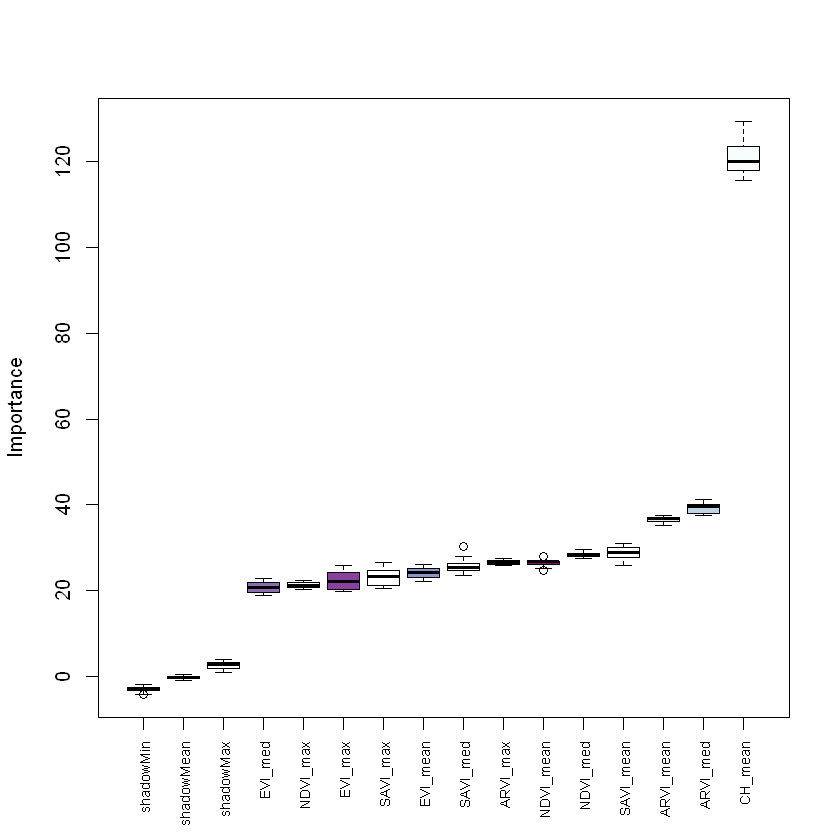

In [8]:
plot(boruta, xlab = "", xaxt = "n", col = brewer.pal(9, "BuPu"))
lz<-lapply(1:ncol(boruta$ImpHistory),function(i)
boruta$ImpHistory[is.finite(boruta$ImpHistory[,i]),i])
names(lz) <- colnames(boruta$ImpHistory)
Labels <- sort(sapply(lz,median))
axis(side = 1,las=2,labels = names(Labels),
at = 1:ncol(boruta$ImpHistory), cex.axis = 0.7)

In [9]:
data3 <- read.csv("SRER_2017_training_bi.csv")

In [10]:
data4 <- na.omit(data3)
traindata2 = subset(data4, select = -c(OID_,Id,gridcode,Shape_Length,Shape_Area))
str(traindata2)

'data.frame':	4339 obs. of  14 variables:
 $ CH_mean  : num  0.1907 0.045 0.01 0.0117 0.0138 ...
 $ ARVI_max : num  0.6091 0.3878 0.0388 0.1898 0.3227 ...
 $ ARVI_mean: num  0.34418 0.2453 0.00404 0.03342 0.08032 ...
 $ ARVI_med : num  0.3794 0.2749 0.0268 0.019 0.0615 ...
 $ EVI_max  : num  0.443 0.332 0.151 0.199 0.248 ...
 $ EVI_mean : num  0.292 0.253 0.132 0.142 0.159 ...
 $ EVI_med  : num  0.291 0.244 0.135 0.138 0.142 ...
 $ NDVI_max : num  0.666 0.526 0.208 0.341 0.457 ...
 $ NDVI_mean: num  0.477 0.407 0.182 0.207 0.247 ...
 $ NDVI_med : num  0.508 0.434 0.205 0.197 0.228 ...
 $ SAVI_max : num  0.407 0.329 0.15 0.197 0.249 ...
 $ SAVI_mean: num  0.286 0.255 0.132 0.142 0.159 ...
 $ SAVI_med : num  0.288 0.248 0.135 0.139 0.143 ...
 $ Veg_class: Factor w/ 2 levels "non-woody","woody": 2 1 1 1 1 2 1 1 2 2 ...


In [11]:
set.seed(1000)
boruta2 <- Boruta(Veg_class~., data = traindata2, doTrace = 2)
boruta2

 1. run of importance source...
 2. run of importance source...
 3. run of importance source...
 4. run of importance source...
 5. run of importance source...
 6. run of importance source...
 7. run of importance source...
 8. run of importance source...
 9. run of importance source...
 10. run of importance source...
 11. run of importance source...
After 11 iterations, +42 secs: 
 confirmed 13 attributes: ARVI_max, ARVI_mean, ARVI_med, CH_mean, EVI_max and 8 more;
 no more attributes left.



Boruta performed 11 iterations in 42.29932 secs.
 13 attributes confirmed important: ARVI_max, ARVI_mean, ARVI_med,
CH_mean, EVI_max and 8 more;
 No attributes deemed unimportant.

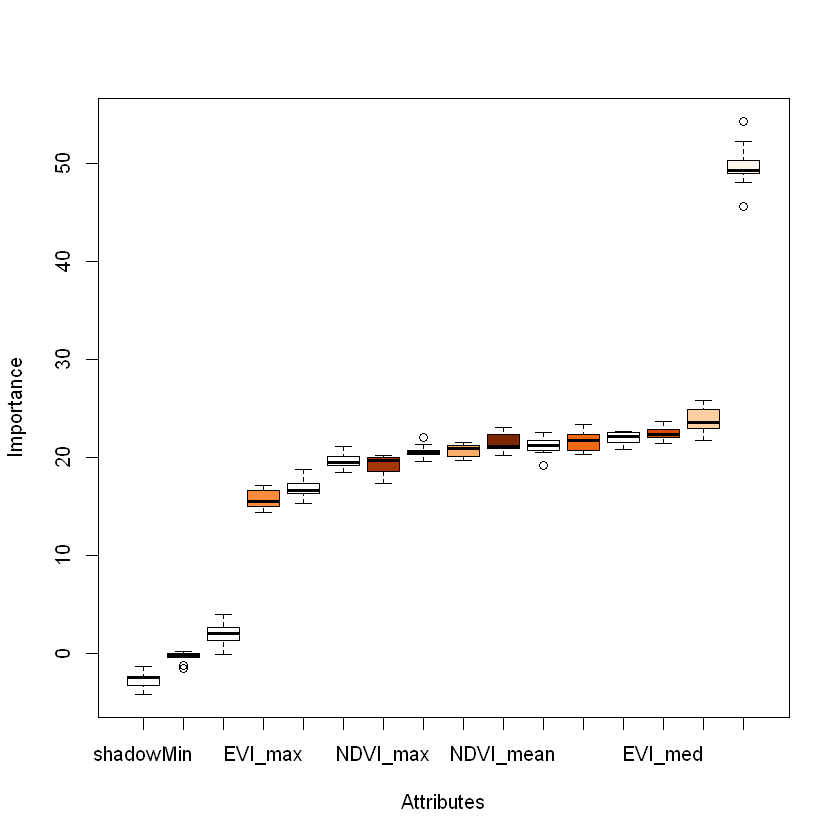

In [12]:
plot(boruta2, col = brewer.pal(9, "Oranges"))

In [13]:
print(boruta)

Boruta performed 11 iterations in 56.03682 secs.
 13 attributes confirmed important: ARVI_max, ARVI_mean, ARVI_med,
CH_mean, EVI_max and 8 more;
 No attributes deemed unimportant.


In [14]:
getConfirmedFormula(boruta2)

Veg_class ~ CH_mean + ARVI_max + ARVI_mean + ARVI_med + EVI_max + 
    EVI_mean + EVI_med + NDVI_max + NDVI_mean + NDVI_med + SAVI_max + 
    SAVI_mean + SAVI_med
<environment: 0x0000000065019e48>

In [15]:
attStats(boruta2)

meanImp  medianImp minImp   maxImp   normHits decision 
CH_mean   49.70226 49.26248  45.60568 54.26302 1        Confirmed
ARVI_max  20.58210 20.46709  19.59398 22.04444 1        Confirmed
ARVI_mean 23.78035 23.52744  21.73926 25.76954 1        Confirmed
ARVI_med  20.67198 20.91498  19.66599 21.55878 1        Confirmed
EVI_max   15.77917 15.54937  14.41228 17.19621 1        Confirmed
EVI_mean  21.61169 21.73886  20.28631 23.32754 1        Confirmed
EVI_med   22.42904 22.30426  21.39389 23.69180 1        Confirmed
NDVI_max  19.22839 19.71412  17.35016 20.16701 1        Confirmed
NDVI_mean 21.55562 21.16279  20.21598 23.04055 1        Confirmed
NDVI_med  19.64057 19.49074  18.50830 21.09724 1        Confirmed
SAVI_max  16.91107 16.67729  15.36454 18.75414 1        Confirmed
SAVI_mean 21.95149 22.16380  20.85514 22.69189 1        Confirmed
SAVI_med  21.19036 21.18412  19.15857 22.56071 1        Confirmed

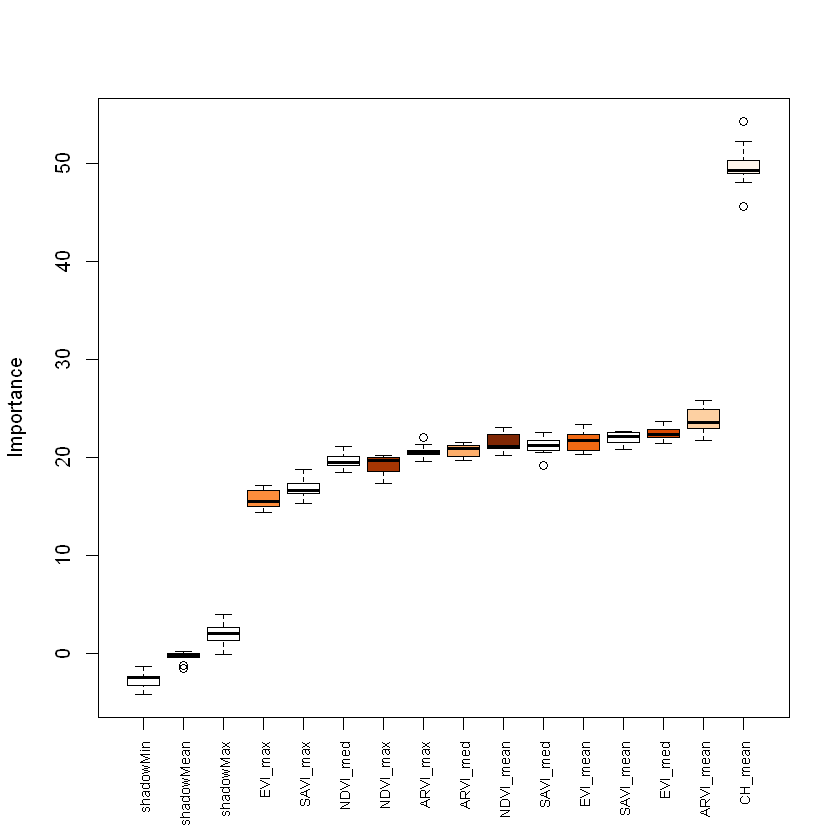

In [16]:
plot(boruta2, xlab = "", xaxt = "n", col = brewer.pal(9, "Oranges"))
lz<-lapply(1:ncol(boruta2$ImpHistory),function(i)
boruta2$ImpHistory[is.finite(boruta2$ImpHistory[,i]),i])
names(lz) <- colnames(boruta2$ImpHistory)
Labels <- sort(sapply(lz,median))
axis(side = 1,las=2,labels = names(Labels),
at = 1:ncol(boruta2$ImpHistory), cex.axis = 0.7)

In [17]:
data5 <- read.csv("JORN17_dataset_v1.csv")

In [19]:
data5$Veg_class = as.factor(data5$Veg_class)
data6 <- na.omit(data5)
traindata3 = subset(data6, select = -c(OID_,Id,gridcode,Shape_Length,Shape_Area))
str(traindata3)

'data.frame':	2649 obs. of  14 variables:
 $ CH_mean  : num  0.01 0.01 0.0125 0.06 0.012 ...
 $ ARVI_mean: num  0.224 0.288 0.289 0.33 0.276 ...
 $ ARVI_med : num  0.227 0.288 0.313 0.376 0.342 ...
 $ ARVI_max : num  0.239 0.316 0.46 0.498 0.416 ...
 $ EVI_mean : num  0.273 0.302 0.3 0.313 0.264 ...
 $ EVI_med  : num  0.274 0.302 0.319 0.336 0.28 ...
 $ EVI_max  : num  0.308 0.306 0.375 0.386 0.315 ...
 $ NDVI_mean: num  0.402 0.448 0.447 0.478 0.432 ...
 $ NDVI_med : num  0.406 0.448 0.466 0.517 0.488 ...
 $ NDVI_max : num  0.428 0.469 0.571 0.599 0.519 ...
 $ SAVI_mean: num  0.279 0.301 0.299 0.31 0.266 ...
 $ SAVI_med : num  0.28 0.301 0.314 0.326 0.274 ...
 $ SAVI_max : num  0.317 0.304 0.358 0.369 0.312 ...
 $ Veg_class: Factor w/ 3 levels "","non-woody",..: 3 3 3 3 3 3 2 3 3 3 ...


In [20]:
set.seed(100)
boruta3 <- Boruta(Veg_class~., data = traindata3, doTrace = 2)
boruta3

 1. run of importance source...
Warning message:
"Dropped unused factor level(s) in dependent variable: ." 2. run of importance source...
Warning message:
"Dropped unused factor level(s) in dependent variable: ." 3. run of importance source...
Warning message:
"Dropped unused factor level(s) in dependent variable: ." 4. run of importance source...
Warning message:
"Dropped unused factor level(s) in dependent variable: ." 5. run of importance source...
Warning message:
"Dropped unused factor level(s) in dependent variable: ." 6. run of importance source...
Warning message:
"Dropped unused factor level(s) in dependent variable: ." 7. run of importance source...
Warning message:
"Dropped unused factor level(s) in dependent variable: ." 8. run of importance source...
Warning message:
"Dropped unused factor level(s) in dependent variable: ." 9. run of importance source...
Warning message:
"Dropped unused factor level(s) in dependent variable: ." 10. run of importance source...
Warning messa

Boruta performed 25 iterations in 47.45042 secs.
 13 attributes confirmed important: ARVI_max, ARVI_mean, ARVI_med,
CH_mean, EVI_max and 8 more;
 No attributes deemed unimportant.

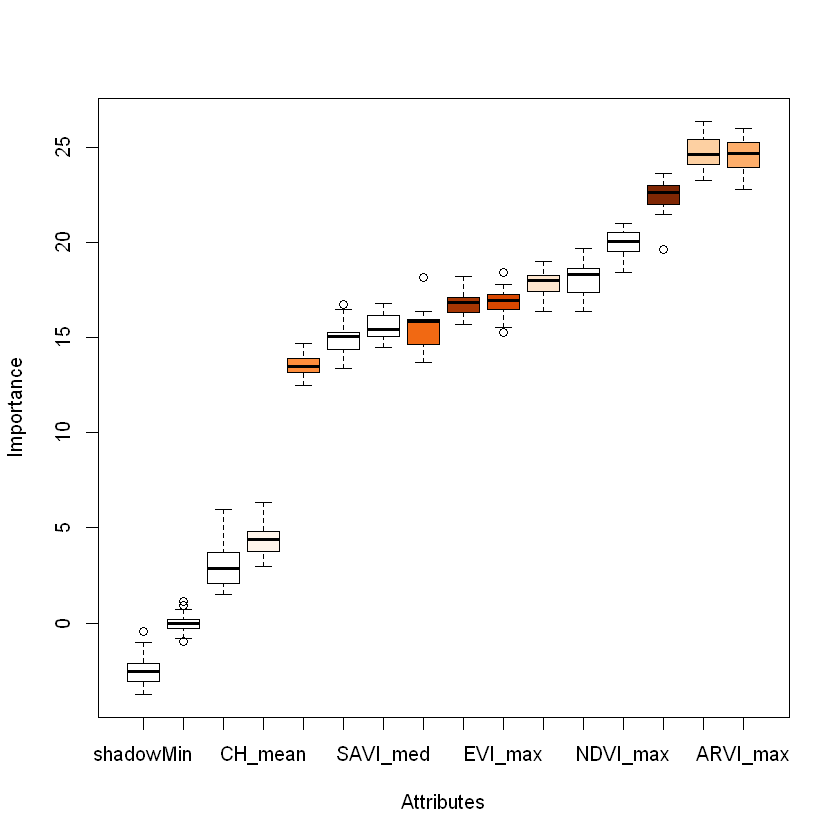

In [21]:
plot(boruta3, col = brewer.pal(9, "Oranges"))

In [22]:
getConfirmedFormula(boruta3)

Veg_class ~ CH_mean + ARVI_mean + ARVI_med + ARVI_max + EVI_mean + 
    EVI_med + EVI_max + NDVI_mean + NDVI_med + NDVI_max + SAVI_mean + 
    SAVI_med + SAVI_max
<environment: 0x0000000064f83040>

In [23]:
attStats(boruta3)

meanImp   medianImp minImp    maxImp    normHits decision 
CH_mean    4.376565  4.381913  2.979316  6.327568 0.84     Confirmed
ARVI_mean 17.869092 17.989820 16.392713 19.023156 1.00     Confirmed
ARVI_med  24.707132 24.622856 23.252703 26.379218 1.00     Confirmed
ARVI_max  24.658892 24.707345 22.798677 25.984012 1.00     Confirmed
EVI_mean  13.550617 13.488128 12.499544 14.692844 1.00     Confirmed
EVI_med   15.462835 15.855181 13.707810 18.152139 1.00     Confirmed
EVI_max   16.842076 16.934788 15.260524 18.441249 1.00     Confirmed
NDVI_mean 16.802014 16.865936 15.697552 18.205564 1.00     Confirmed
NDVI_med  22.475591 22.632876 19.652382 23.644780 1.00     Confirmed
NDVI_max  20.012786 20.050269 18.412826 21.017647 1.00     Confirmed
SAVI_mean 14.928963 15.064136 13.380049 16.747867 1.00     Confirmed
SAVI_med  15.570365 15.427263 14.485109 16.812177 1.00     Confirmed
SAVI_max  18.014219 18.309358 16.381953 19.675050 1.00     Confirmed

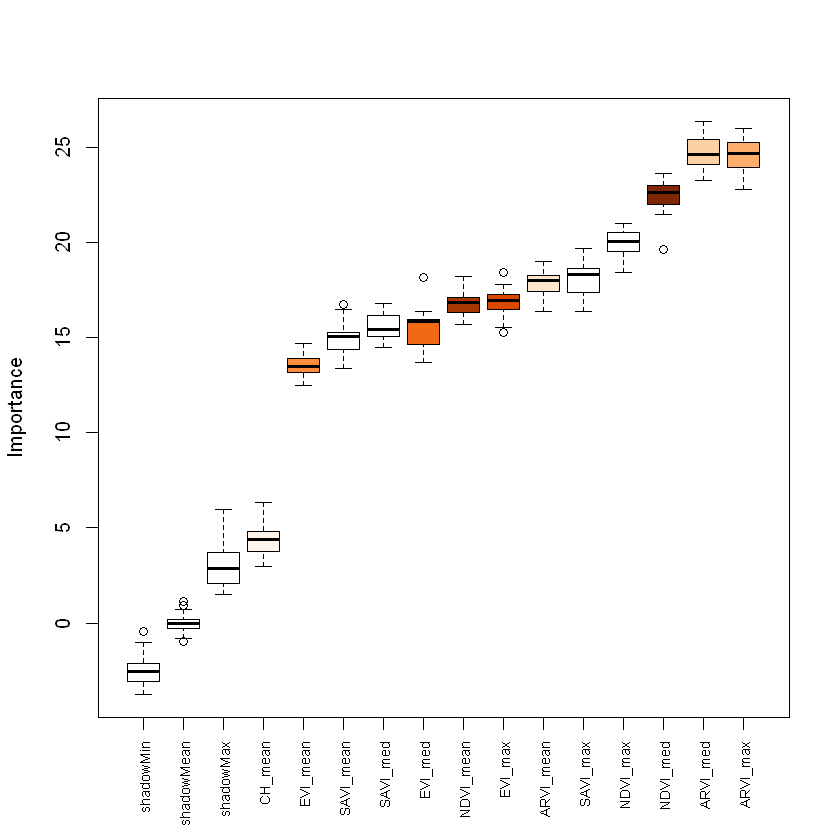

In [26]:
plot(boruta3, xlab = "", xaxt = "n", col = brewer.pal(9, "Oranges"))
lz<-lapply(1:ncol(boruta3$ImpHistory),function(i)
boruta3$ImpHistory[is.finite(boruta3$ImpHistory[,i]),i])
names(lz) <- colnames(boruta3$ImpHistory)
Labels <- sort(sapply(lz,median))
axis(side = 1,las=2,labels = names(Labels),
at = 1:ncol(boruta3$ImpHistory), cex.axis = 0.7)